# API Test Notebook

In [ ]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b54bcf4d-1bca-4e8e-9a24-22ff2c3d462c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'a6030040-443c-4278-90ca-dcc02025addd',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [ ]:
# Increase the 'data_rate_limit'
# Search > Terminal > Shell > New Window 
# (base) Paste: " jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10 "

# copy and paste in url:
# http://localhost:8890/tree?token=069ae1610d2d7b6115adb2e28c65aff8a7dfa15169fb4f0a

In [ ]:
# normalize or standerdize it to make it look a little better
# the data is in json format

In [ ]:
type(data)

In [ ]:
import pandas as pd

In [ ]:
# there is data inside this
# we have the 'status'
# we can pull in the 'status'

pd.json_normalize(data['status'])

In [ ]:
pd.json_normalize(data['data'])

In [ ]:
#This allows you to see all the columns, not just like 15

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
pd.json_normalize(data['data'])

# Automate the process

In [ ]:
# automate this data collection process 
# have the data ready for use

# Timestamp

In [ ]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

In [ ]:
# limit this to top 15

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15', #change this to 15
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'a6030040-443c-4278-90ca-dcc02025addd',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [ ]:
type(data)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

# Automate

In [1]:
import pandas as pd
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
from time import sleep

# Initialize the global DataFrame
df = pd.DataFrame()

def api_runner():
    global df  # Declare df as global to modify it within the function

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '15', 
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'a6030040-443c-4278-90ca-dcc02025addd',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        # Normalize JSON data and add a timestamp
        df2 = pd.json_normalize(data['data'])
        df2['Timestamp'] = pd.to_datetime('now')
        # Append to the global DataFrame
        df = pd.concat([df, df2], ignore_index=True)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

# Run the API runner in a loop
for i in range(333): 
    api_runner()
    print('API Runner completed')
    sleep(60)  # Sleep for 1 minute

API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [3]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11818,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.979057e+07,1.979057e+07,...,53.8441,2.030022e+12,None,2024-12-04T07:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-04 15:37:11.892512
1,1027,Ethereum,ETH,ethereum,9627,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204420e+08,1.204420e+08,...,12.5712,4.466629e+11,None,2024-12-04T07:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-04 15:37:11.892512
2,52,XRP,XRP,xrp,1460,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.705149e+10,9.998695e+10,...,4.2327,2.633867e+11,None,2024-12-04T07:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-04 15:37:11.892512
3,825,Tether USDt,USDT,tether,106597,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.349839e+11,1.381944e+11,...,3.8041,1.382767e+11,None,2024-12-04T07:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-04 15:37:11.892512
4,5426,Solana,SOL,solana,802,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.752436e+08,5.894159e+08,...,3.1765,1.398758e+11,None,2024-12-04T07:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-04 15:37:11.892512
5,1839,BNB,BNB,bnb,2293,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440094e+08,1.440094e+08,...,3.0730,1.090949e+11,None,2024-12-04T07:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-04 15:37:11.892512
6,74,Dogecoin,DOGE,dogecoin,1116,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.470571e+11,1.470571e+11,...,1.7467,6.206237e+10,None,2024-12-04T07:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-04 15:37:11.892512
7,2010,Cardano,ADA,cardano,1380,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.508588e+10,4.499487e+10,...,1.2130,5.527829e+10,None,2024-12-04T07:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-04 15:37:11.892512
8,3408,USDC,USDC,usd-coin,23547,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.016920e+10,4.016920e+10,...,1.1305,4.016655e+10,None,2024-12-04T07:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-12-04 15:37:11.892512
9,1958,TRON,TRX,tron,1079,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.629042e+10,8.629043e+10,...,0.9409,3.340335e+10,None,2024-12-04T07:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-04 15:37:11.892512


In [5]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11818,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19790568.00000,19790568.00000,...,53.84410,2030022484129.85010,None,2024-12-04T07:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-04 15:37:11.892512
1,1027,Ethereum,ETH,ethereum,9627,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120441990.11962,120441990.11962,...,12.57120,446662855085.15002,None,2024-12-04T07:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-04 15:37:11.892512
2,52,XRP,XRP,xrp,1460,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57051491087.00000,99986947886.00000,...,4.23270,263386679705.79999,None,2024-12-04T07:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-04 15:37:11.892512
3,825,Tether USDt,USDT,tether,106597,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,134983904742.73035,138194367894.35284,...,3.80410,138276701429.95001,None,2024-12-04T07:36:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-04 15:37:11.892512
4,5426,Solana,SOL,solana,802,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,475243571.31140,589415948.37011,...,3.17650,139875816955.67001,None,2024-12-04T07:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-04 15:37:11.892512
5,1839,BNB,BNB,bnb,2293,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144009438.22000,144009438.22000,...,3.07300,109094870654.36000,None,2024-12-04T07:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-04 15:37:11.892512
6,74,Dogecoin,DOGE,dogecoin,1116,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147057066383.70520,147057066383.70520,...,1.74670,62062373414.62000,None,2024-12-04T07:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-04 15:37:11.892512
7,2010,Cardano,ADA,cardano,1380,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35085884197.24636,44994868463.33723,...,1.21300,55278285867.59000,None,2024-12-04T07:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-04 15:37:11.892512
8,3408,USDC,USDC,usd-coin,23547,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,40169203157.93290,40169203157.93290,...,1.13050,40166554372.60000,None,2024-12-04T07:36:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-12-04 15:37:11.892512
9,1958,TRON,TRX,tron,1079,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,86290416119.09894,86290434095.63194,...,0.94090,33403353826.90000,None,2024-12-04T07:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-04 15:37:11.892512


In [7]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.02067,1.28782,3.45450,40.62493,55.51334,69.08299
Ethereum,0.65762,2.69447,8.24782,50.59593,53.14905,53.64864
XRP,0.83831,3.03860,88.65364,420.52285,394.11909,375.19633
Tether USDt,-0.00715,0.05138,0.09238,0.11405,0.06353,0.06003
Solana,0.12073,5.00692,1.44228,46.79906,64.46082,78.25369
BNB,-0.39988,16.96529,22.13366,35.51641,34.71127,49.60254
Dogecoin,0.76234,1.93293,6.52081,179.28366,286.65504,330.94745
Cardano,0.24070,-2.97656,25.89051,270.34988,246.19972,279.26483
USDC,-0.01165,0.00239,0.00062,-0.00669,-0.00107,-0.00568


In [9]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h     -0.02067
           quote.USD.percent_change_24h     1.28782
           quote.USD.percent_change_7d      3.45450
           quote.USD.percent_change_30d    40.62493
           quote.USD.percent_change_60d    55.51334
                                             ...   
Chainlink  quote.USD.percent_change_24h    -0.79545
           quote.USD.percent_change_7d     35.41089
           quote.USD.percent_change_30d   129.68815
           quote.USD.percent_change_60d   118.67655
           quote.USD.percent_change_90d   138.39368
Length: 90, dtype: float64

In [13]:
type(df4)

pandas.core.series.Series

In [11]:
# return the df to a df instead of a .Series

df5 = df4.to_frame(name='values')
df5

values
name                                            
Bitcoin   quote.USD.percent_change_1h   -0.02067
          quote.USD.percent_change_24h   1.28782
          quote.USD.percent_change_7d    3.45450
          quote.USD.percent_change_30d  40.62493
          quote.USD.percent_change_60d  55.51334
...                                          ...
Chainlink quote.USD.percent_change_24h  -0.79545
          quote.USD.percent_change_7d   35.41089
          quote.USD.percent_change_30d 129.68815
          quote.USD.percent_change_60d 118.67655
          quote.USD.percent_change_90d 138.39368

[90 rows x 1 columns]

In [15]:
type(df5)

pandas.core.frame.DataFrame

In [17]:
df5.count()

values    90
dtype: int64

In [19]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,values
0,-0.02067
1,1.28782
2,3.45450
3,40.62493
4,55.51334
...,...
85,-0.79545
86,35.41089
87,129.68815
88,118.67655


In [21]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.02067
1,Bitcoin,quote.USD.percent_change_24h,1.28782
2,Bitcoin,quote.USD.percent_change_7d,3.45450
3,Bitcoin,quote.USD.percent_change_30d,40.62493
4,Bitcoin,quote.USD.percent_change_60d,55.51334
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,-0.79545
86,Chainlink,quote.USD.percent_change_7d,35.41089
87,Chainlink,quote.USD.percent_change_30d,129.68815
88,Chainlink,quote.USD.percent_change_60d,118.67655


In [23]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.02067
1,Bitcoin,quote.USD.percent_change_24h,1.28782
2,Bitcoin,quote.USD.percent_change_7d,3.45450
3,Bitcoin,quote.USD.percent_change_30d,40.62493
4,Bitcoin,quote.USD.percent_change_60d,55.51334
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,-0.79545
86,Chainlink,quote.USD.percent_change_7d,35.41089
87,Chainlink,quote.USD.percent_change_30d,129.68815
88,Chainlink,quote.USD.percent_change_60d,118.67655


# Visualization

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Change name of the values in 'percent_change'

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.02067
1,Bitcoin,24h,1.28782
2,Bitcoin,7d,3.45450
3,Bitcoin,30d,40.62493
4,Bitcoin,60d,55.51334
...,...,...,...
85,Chainlink,24h,-0.79545
86,Chainlink,7d,35.41089
87,Chainlink,30d,129.68815
88,Chainlink,60d,118.67655


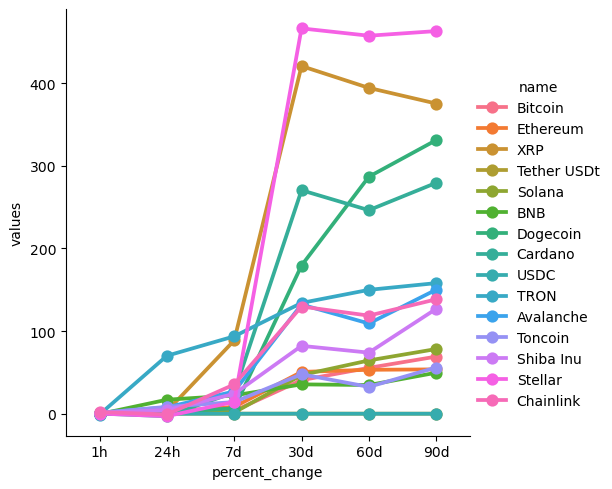

In [31]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [29]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','Timestamp']]
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,96667.73734,2024-12-04 15:37:11.892512
1,Ethereum,3708.53101,2024-12-04 15:37:11.892512
2,XRP,2.63387,2024-12-04 15:37:11.892512
3,Tether USDt,1.00060,2024-12-04 15:37:11.892512
4,Solana,237.31258,2024-12-04 15:37:11.892512
5,BNB,757.55362,2024-12-04 15:37:11.892512
6,Dogecoin,0.42203,2024-12-04 15:37:11.892512
7,Cardano,1.22841,2024-12-04 15:37:11.892512
8,USDC,0.99993,2024-12-04 15:37:11.892512
9,TRON,0.38710,2024-12-04 15:37:11.892512


In [33]:
df10 = df[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,96667.73734,2024-12-04 15:37:11.892512
15,Bitcoin,96667.73734,2024-12-04 15:38:12.366398
30,Bitcoin,96677.38285,2024-12-04 15:39:12.850929
45,Bitcoin,96725.88555,2024-12-04 15:40:13.852884


In [ ]:
sns.lineplot(x='Timestamp', y='quote.USD.price', data = df10)

<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

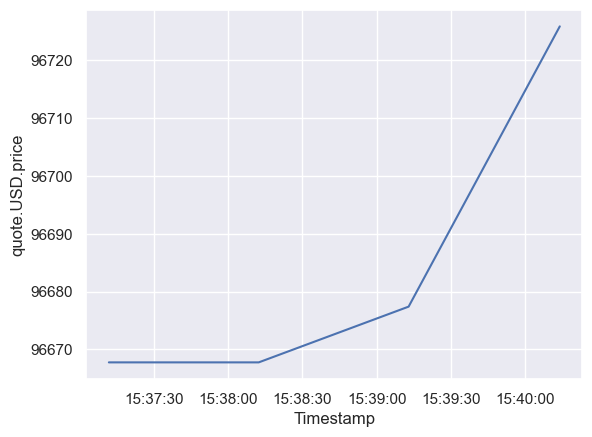

In [35]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='Timestamp', y='quote.USD.price', data = df10)